# RESIDUAL ANALYSIS

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['price'] =california.target
print("Dataset(first 5 rows):\n",df.head())

Dataset(first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
# Step 2: Exploratory Data Analysis (EDA)

# Check the info of the dataset
print('\nData info:')
print(df.info())

# Check the summary statistics of the dataset
print('\nSummary statistics:')
print(df.describe())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

# k-fold cross validation

In [34]:
# Step 1: Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=10)

In [35]:
# Step 2: Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
# Step 3: Initialize model
model = LinearRegression()

In [37]:
scores = cross_val_score(model, X ,y ,cv=kf,scoring='r2')
print("Cross-validation scores:",scores)
print("Average scores:",scores.mean())

Cross-validation scores: [0.98959171 0.99111962 0.98673421 0.98481297 0.97910065]
Average scores: 0.9862718333818199


In [4]:
# Step 1: Define Independent (X) and Dependent (Y) Variables
X = df.drop('price',axis=1)
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)
print(f"\nMAE:{mae:.2f}$100k")
print(f"\nRMSE:{rmse:.2f}$100k")
print(f"\nR2:{r2:.2f}")


MAE:0.53$100k

RMSE:0.75$100k

R2:0.58


# Calculate Residuals

In [9]:
residuals = Y_test - y_pred#difference between actualvalue and predicted values
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':Y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


In [ ]:
#positive residual : model underpredicted(e.g.,0.560=$56k too low)
#negative residual : model overpredicted(e.g.,-0.564=$56k too high)

# Residual plots

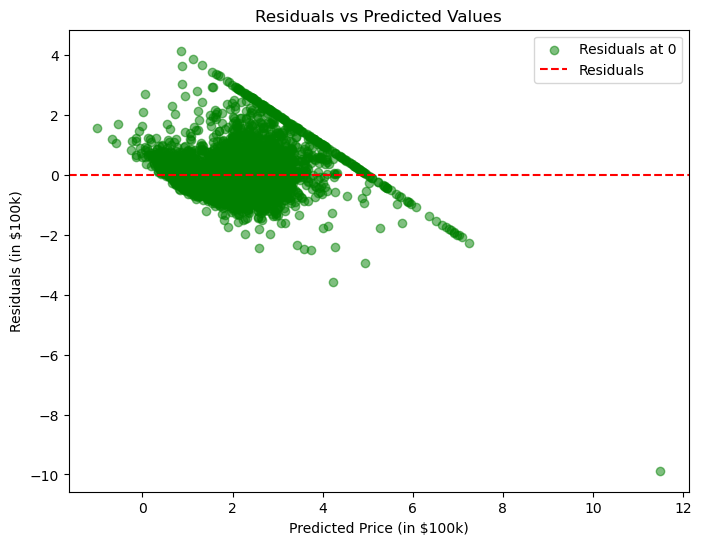

In [13]:
# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs residuals
plt.scatter(y_pred, residuals, color='green', alpha=0.5)

# Add a horizontal line at residual = 0 (ideal scenario)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Price (in $100k)')
plt.ylabel('Residuals (in $100k)')
plt.title('Residuals vs Predicted Values')

# Show legend (even though it's not strictly necessary here)
plt.legend(['Residuals at 0', 'Residuals'])

# Show the plot
plt.show()

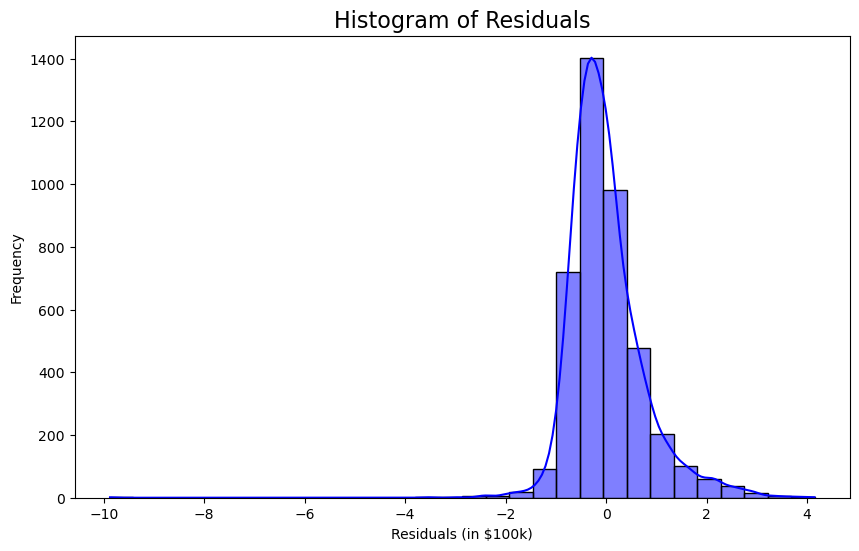

In [14]:
# Step 10: Plot histogram of residuals
plt.figure(figsize=(10, 6))
# Use seaborn to plot the histogram of residuals
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel('Residuals (in $100k)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals',fontsize=16)
plt.show()


#Good : Bell-shaped curve(normal)
#Bad  : Skewed or multi-peaked

# Q-Q PLOT

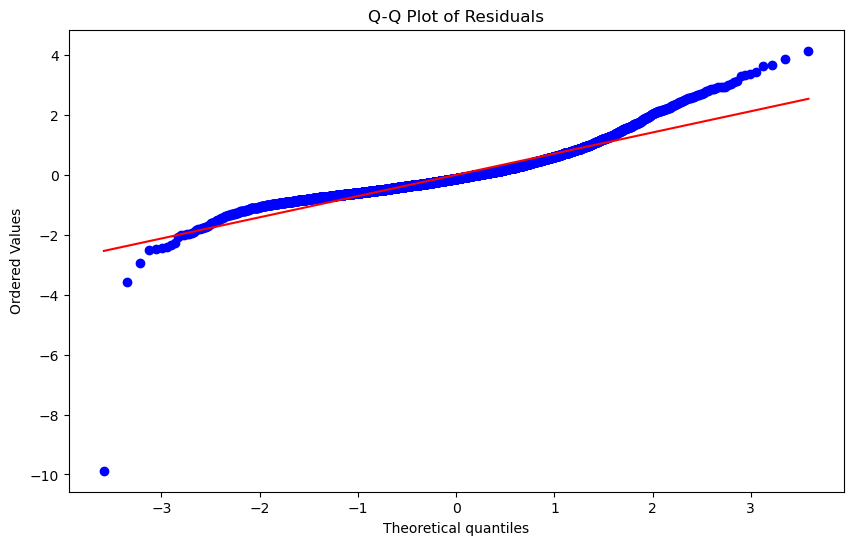

In [16]:
import scipy.stats as stats
# Step 11: Create a Q-Q plot of the residuals
plt.figure(figsize=(10, 6))
# Create the Q-Q plot using scipy.stats.probplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# K-FOLD CROSS VALIDATION

In [23]:
import numpy as np
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [29]:
# Step 1: Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=10)

In [30]:
# Step 2: Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
# Step 3: Initialize model
model = LinearRegression()

In [32]:
scores = cross_val_score(model, X ,y ,cv=kf,scoring='r2')
print("Cross-validation scores:",scores)
print("Average scores:",scores.mean())

Cross-validation scores: [0.86705953 0.96772228 0.87539223 0.92564244 0.95975236]
Average scores: 0.91911376809378
